# Ryanair-Flug 4978

### Business Unterstanding

Das Flugzeug mit dem polnischen Kennzeichen SP-RSM startete am 23. Mai 2021 um 10:29 Uhr Ortszeit und damit etwa 19 Minuten verspätet vom Flughafen Athen-Eleftherios Venizelos. Sein Ziel war der Flughafen Vilnius mit einer geplanten Landung um 13:00 Uhr Ortszeit.

Um 12:30 Uhr Ortszeit erreichte die Boeing 737-800 den weißrussischen Luftraum, wo die Piloten durch die weißrussische Flugsicherung über eine angebliche Bombendrohung unterrichtet wurden. Nach weißrussischen Angaben habe es Informationen zu möglichen Explosivstoffen an Bord gegeben. Der Flug wurde gegen 12:46 Uhr Ortszeit, kurz vor dem Einflug in den litauischen Luftraum, für eine angebliche Notlandung zum Nationalen Flughafen Minsk umdirigiert. Die Anweisung dafür soll Präsident Aljaksandr Lukaschenka selbst erteilt haben. Das Flugzeug wurde dabei von einem bewaffneten weißrussischen Kampfflugzeug des Typs MiG-29 begleitet. Berichten zufolge sollen die weißrussischen Behörden mit dem Abschuss des zivilen Flugzeuges gedroht haben; Weißrussland bestätigte diese Berichte nicht. Zum Zeitpunkt der Umlenkung um 12:46 Uhr Ortszeit war das Flugzeug 72 km vom Flughafen Vilnius und 30 km von der litauischen Grenze entfernt, von Minsk jedoch 183 km Luftlinie (bzw. 300 km Flugstrecke). Außerdem befand es sich trotz dieser nur noch 72 km zum Ziel immer noch in Reiseflughöhe, obwohl Flugzeuge auf dieser Route normalerweise schon in 177 km Entfernung von Vilnius zum Sinkflug ansetzen. Um 12:48 Uhr Ortszeit sollen die Piloten laut Berichten einen Mayday-Notruf abgesetzt haben.


Eine solche weißrussische MiG-29 fing das Passagierflugzeug ab.
Um 13:21 Uhr Ortszeit landete das Flugzeug in Minsk. Der regimekritische Journalist Raman Pratassewitsch, der sich an Bord befand, wurde anschließend verhaftet. Auch die Studentin Sofia Sapega, Pratassewitschs Lebensgefährtin und russische Staatsbürgerin, wurde verhaftet. Im Gepäck der Passagiere fand sich kein Hinweis auf Sprengstoff.

- startete am 23. Mai 2021 um 10:29 Uhr Ortszeit vom Flughafen Athen-Eleftherios Venizelos, Ziel war der Flughafen Vilnius
- um 12:30 Uhr Ortszeit erreichte die Boeing 737-800 den weißrussischen Luftraum, wo die Piloten durch die weißrussische Flugsicherung über eine angebliche Bombendrohung unterrichtet wurden (mögliche Explosivstoffe an Bord)
- der Flug wurde gegen 12:46 Uhr Ortszeit, kurz vor dem Einflug in den litauischen Luftraum, für eine angebliche Notlandung zum Nationalen Flughafen Minsk umdirigiert
- zum Zeitpunkt der Umlenkung um 12:46 Uhr Ortszeit war das Flugzeug 72 km vom Flughafen Vilnius und 30 km von der litauischen Grenze entfernt, von Minsk jedoch 183 km Luftlinie (bzw. 300 km Flugstrecke)
- das Flugzeug befand sich trotz dieser nur noch 72 km zum Ziel immer noch in Reiseflughöhe, obwohl Flugzeuge auf dieser Route normalerweise schon in 177 km Entfernung von Vilnius zum Sinkflug ansetzen
- um 13:21 Uhr Ortszeit landete das Flugzeug in Minsk
- der regimekritische Journalist Raman Pratassewitsch, der sich an Bord befand, wurde anschließend verhaftet, im Gepäck der Passagiere fand sich kein Hinweis auf Sprengstoff

##### Quelle: [Wikipedia] https://de.wikipedia.org/wiki/Ryanair-Flug_4978

### Data

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("FR4978_27cce9a2.csv", sep=",")
df

,Timestamp,UTC,Callsign,Position,Altitude,Speed,Direction
0,1621754943,2021-05-23T07:29:03Z,RYR1TZ,"37.943665,23.962408",125,145,37
1,1621754953,2021-05-23T07:29:13Z,RYR1TZ,"37.949295,23.967785",325,161,37
2,1621754966,2021-05-23T07:29:26Z,RYR1TZ,"37.956924,23.975273",900,156,37
3,1621754978,2021-05-23T07:29:38Z,RYR1TZ,"37.964096,23.982319",1425,156,37
4,1621754988,2021-05-23T07:29:48Z,RYR1TZ,"37.96994,23.987888",1775,160,37
...,...,...,...,...,...,...,...
517,1621765273,2021-05-23T10:21:13Z,RYR1TZ,"53.887104,28.027693",0,24,317
518,1621765279,2021-05-23T10:21:19Z,RYR1TZ,"53.88763,28.026928",0,25,317
519,1621765291,2021-05-23T10:21:31Z,RYR1TZ,"53.888683,28.025356",0,25,317
520,1621765302,2021-05-23T10:21:42Z,RYR1TZ,"53.889221,28.024548",0,6,317


### Data Preparation

In [496]:
#Editing the DataFrame - Position
df["Position NS"]=0
df["Position OW"]=0
for i in range(len(df)):
    xkoord, ykoord = df["Position"].iloc[i].split(",")
    df["Position NS"].iloc[i] = float(xkoord)
    df["Position OW"].iloc[i] = float(ykoord)
df = df.drop(columns=["Position"])

#Editing the DataFrame - Time   ----Achtung! Unregelmäßig!
from datetime import datetime

l_date = []
for i in range(len(df)):
    date_time_str = df["UTC"].iloc[i]
    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%SZ')
    l_date.append(date_time_obj)

df["UTC"]=l_date
df["Flightphase"]=""

import geopandas
from shapely.geometry import Point, Polygon
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
polys = geopandas.GeoSeries({
    'Griechenland': world["geometry"].loc[world.name == 'Greece'].item(),
    'Rumänien': world["geometry"].loc[world.name == 'Romania'].item(),
    'Bulgarien': world["geometry"].loc[world.name == 'Bulgaria'].item(),
    'Ukraine': world["geometry"].loc[world.name == 'Ukraine'].item(),
    'Belarus': world["geometry"].loc[world.name == 'Belarus'].item(),
    'Litauen': world["geometry"].loc[world.name == 'Lithuania'].item()
})

points = []                                                                                      #
for i in range(len(df)):                                                                         # Code nach der Vorlage:
    points.append(Point(df["Position OW"].iloc[i], df["Position NS"].iloc[i]))                   # https://stackoverflow.com/questions/48097742/geopandas-point-in-polygon
df_points = geopandas.GeoDataFrame(geometry=points, index=np.arange(0,len(df)))                  #
df_points = df_points.assign(**{key: df_points.within(geom) for key, geom in polys.items()})     #

df["Country"]=""
for col in df_points.columns:
    for i in range(len(df_points)):
        if df_points[col].iloc[i]:
            df["Country"].iloc[i]=col
            
df

C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Timestamp,UTC,Callsign,Altitude,Speed,Direction,Position NS,Position OW,Flightphase,Country
0,1621754943,2021-05-23 07:29:03,RYR1TZ,125,145,37,37.943665,23.962408,,Griechenland
1,1621754953,2021-05-23 07:29:13,RYR1TZ,325,161,37,37.949295,23.967785,,Griechenland
2,1621754966,2021-05-23 07:29:26,RYR1TZ,900,156,37,37.956924,23.975273,,Griechenland
3,1621754978,2021-05-23 07:29:38,RYR1TZ,1425,156,37,37.964096,23.982319,,Griechenland
4,1621754988,2021-05-23 07:29:48,RYR1TZ,1775,160,37,37.969940,23.987888,,Griechenland
...,...,...,...,...,...,...,...,...,...,...
517,1621765273,2021-05-23 10:21:13,RYR1TZ,0,24,317,53.887104,28.027693,,Belarus
518,1621765279,2021-05-23 10:21:19,RYR1TZ,0,25,317,53.887630,28.026928,,Belarus
519,1621765291,2021-05-23 10:21:31,RYR1TZ,0,25,317,53.888683,28.025356,,Belarus
520,1621765302,2021-05-23 10:21:42,RYR1TZ,0,6,317,53.889221,28.024548,,Belarus


### Data Exploration

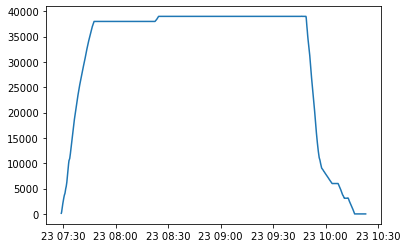

In [497]:
plt.plot(df["UTC"], df["Altitude"]) #Start und Landephase markieren?   #3D-Plot mit X,Y und Höhe?

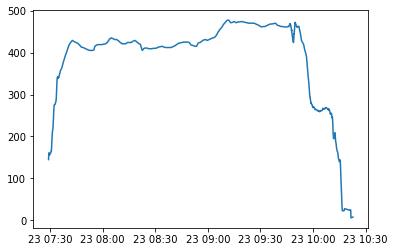

In [498]:
plt.plot(df["UTC"],df["Speed"])

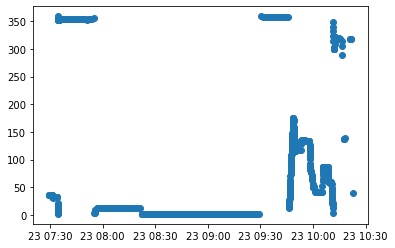

In [499]:
plt.scatter(df["UTC"], df["Direction"]) #Achtung - Übergang 0-360-0 - Darstellung auf "Kompass"?

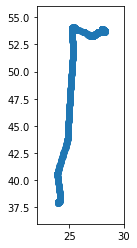

In [500]:
plt.scatter(df["Position OW"], df["Position NS"]) #Einheitliche Axenskalierungen! #Color-Mapping mit Parameter "norm" möglich
plt.gca().set_aspect("equal", adjustable="box")
plt.xlim(22, 30)
plt.ylim(36, 56)
plt.draw()

### Data 2 - Vergleichsdatensatz (Standardflug von Athen nach Minsk)

In [501]:
df_standardflug = pd.read_csv("Standardflug_Athen_Vilnius.csv", sep=",")
#Editing the DataFrame - Position
df_standardflug["Position NS"]=0
df_standardflug["Position OW"]=0
for i in range(len(df_standardflug)):
    xkoord, ykoord = df_standardflug["Position"].iloc[i].split(",")
    df_standardflug["Position NS"].iloc[i] = float(xkoord)
    df_standardflug["Position OW"].iloc[i] = float(ykoord)
df_standardflug = df_standardflug.drop(columns=["Position"])

#Editing the DataFrame - Time   ----Achtung! Unregelmäßig!
from datetime import datetime

l_date = []
for i in range(len(df_standardflug)):
    date_time_str = df_standardflug["UTC"].iloc[i]
    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%SZ')
    l_date.append(date_time_obj)

df_standardflug["UTC"]=l_date
df_standardflug

C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Timestamp,UTC,Callsign,Altitude,Speed,Direction,Position NS,Position OW
0,1621148758,2021-05-16 07:05:58,RYR1TZ,0,1,216,37.931774,23.943209
1,1621148784,2021-05-16 07:06:24,RYR1TZ,0,2,219,37.931984,23.943403
2,1621148817,2021-05-16 07:06:57,RYR1TZ,0,1,185,37.932182,23.943642
3,1621149028,2021-05-16 07:10:28,RYR1TZ,0,7,120,37.932243,23.943869
4,1621149034,2021-05-16 07:10:34,RYR1TZ,0,10,126,37.932083,23.944147
...,...,...,...,...,...,...,...,...
370,1621158312,2021-05-16 09:45:12,RYR1TZ,0,9,267,54.644211,25.282610
371,1621158316,2021-05-16 09:45:16,RYR1TZ,0,9,239,54.644112,25.282351
372,1621158320,2021-05-16 09:45:20,RYR1TZ,0,8,239,54.644016,25.282125
373,1621158326,2021-05-16 09:45:26,RYR1TZ,0,4,236,54.643970,25.281904


### Exploration Graphics

C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Exploration Graphic: Scatter Matrix with Histograms')

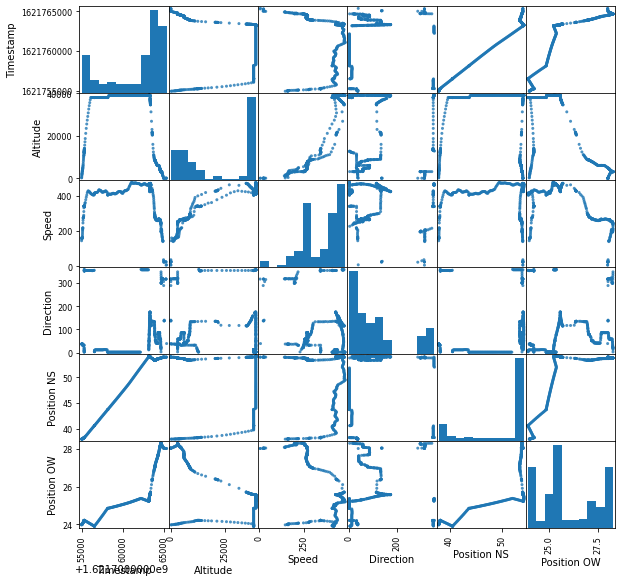

In [502]:
fig = plt.figure(figsize=[9.6,9.6])
fig.tight_layout(pad=3.0)
ax = fig.add_subplot(111)
pd.plotting.scatter_matrix(df, alpha=0.8, ax=ax)
ax.set_title(label='Exploration Graphic: Scatter Matrix with Histograms', fontsize=18, fontstyle='oblique')

### Presentation Graphics

In [503]:
for i in range(1,len(df)):
    a = df["Altitude"].iloc[i]
    b = df["Altitude"].iloc[i-1]
    if (a-b==0):
        begin_flightphase = i
        print(i)
        break
        
for i in range(begin_flightphase,len(df)):
    a = df["Altitude"].iloc[i]
    b = df["Altitude"].iloc[i-1]
    if (a-b<-2000):
        end_flightphase = i
        print(i)
        break
df_flightphase = df[begin_flightphase:end_flightphase]

72
313


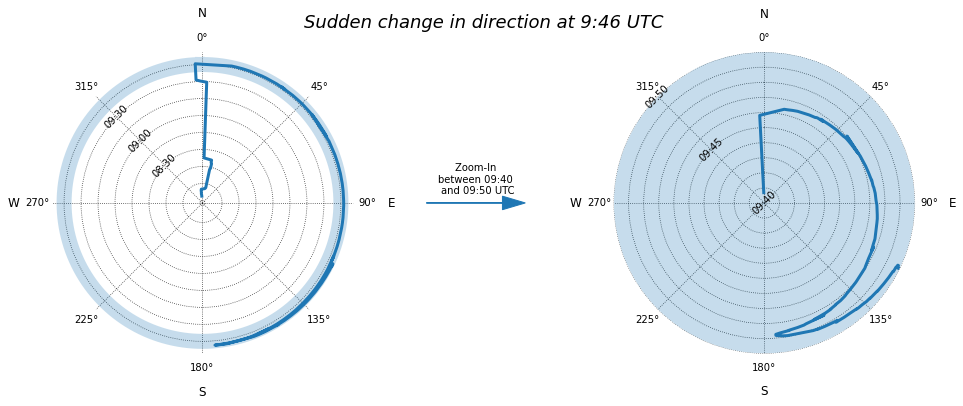

In [504]:
fig = plt.figure(figsize=[14.0,6.2])
ax1 = fig.add_subplot(1,5,(1,2), polar=True)

ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1) 

plt.gca().axes.yaxis.set_ticklabels([])

ax1.grid(alpha=0.8, color="black", linestyle=":")
ax1.set_axisbelow(True)

#ax1.set_title(label='Sudden change in direction at 9:45 UTC\n \n', fontsize=18, fontstyle='oblique')

ax1.text(315*np.pi/180, datetime.strptime('2021-05-23T08:30:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="08:30", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax1.text(315*np.pi/180, datetime.strptime('2021-05-23T09:00:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:00", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax1.text(315*np.pi/180, datetime.strptime('2021-05-23T09:30:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:30", rotation=45, va="center", ha="center", fontsize="medium", color="black")

ax1.plot(df_flightphase["Direction"]* np.pi/180, df_flightphase["UTC"], color="tab:blue", linewidth=3)
ax1.plot(np.arange(0,359)* np.pi/180, np.full(359,datetime.strptime('2021-05-23T09:45:00Z', '%Y-%m-%dT%H:%M:%SZ')), alpha=0.25, linewidth=15)

ax1.set_facecolor("white")
ax1.spines["polar"].set_visible(False)

def plot_directions(ax, time_str='2021-05-23T10:30:00Z'):
    ax.text(0*np.pi/180, datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%SZ'), s="N", va="center", ha="center", fontsize="large", color="black")
    ax.text(180*np.pi/180, datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%SZ'), s="S", va="center", ha="center", fontsize="large", color="black")
    ax.text(270*np.pi/180, datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%SZ'), s="W", va="center", ha="center", fontsize="large", color="black")
    ax.text(90*np.pi/180, datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%SZ'), s="E", va="center", ha="center", fontsize="large", color="black")

plot_directions(ax1)

ax2 = fig.add_subplot(1,5,(4,5), polar=True, title='Sudden change in direction at 9:45 UTC\n \n')

ax2.set_theta_zero_location("N")
ax2.set_theta_direction(-1) 

plt.gca().axes.yaxis.set_ticklabels([])
ax2.text(315*np.pi/180, datetime.strptime('2021-05-23T09:40:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:40", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax2.text(315*np.pi/180, datetime.strptime('2021-05-23T09:45:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:45", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax2.text(315*np.pi/180, datetime.strptime('2021-05-23T09:50:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:50", rotation=45, va="center", ha="center", fontsize="medium", color="black")

ax2.grid(alpha=0.8, color="black", linestyle=":")
ax2.set_axisbelow(True)

#ax2.set_title(label='Sudden change in direction at 9:45 UTC\n \n', fontsize=18, fontstyle='oblique')

ax2.plot(df_flightphase["Direction"]* np.pi/180, df_flightphase["UTC"], color="tab:blue", linewidth=3)
ax2.plot(np.arange(0,358)* np.pi/180, np.full(358,datetime.strptime('2021-05-23T09:45:00Z', '%Y-%m-%dT%H:%M:%SZ')), alpha=0.25, linewidth=150)

ax2.set_facecolor("white")
ax2.spines["polar"].set_visible(False)
plt.ylim(datetime.strptime('2021-05-23T09:40:00Z', '%Y-%m-%dT%H:%M:%SZ'), datetime.strptime('2021-05-23T09:50:00Z', '%Y-%m-%dT%H:%M:%SZ'))

plot_directions(ax2, time_str='2021-05-23T09:52:30Z')

ax3 = fig.add_subplot(153)
ax3.arrow(0.5,0.5, dx=1,dy=0, width = 0, head_length = 0.3, head_width =0.02, facecolor="tab:blue", edgecolor="tab:blue")
ax3.text(1.17,0.51,s="Zoom-In \nbetween 09:40 \nand 09:50 UTC", ha="center", va="bottom")
plt.ylim(0.25,0.75)
plt.xlim(0.5,2)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_title(label='Sudden change in direction at 9:46 UTC', fontsize=18, fontstyle='oblique')
fig.tight_layout(pad=3.0)

fig.savefig('test.png', bbox_inches='tight')

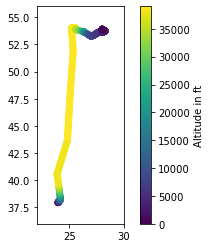

In [505]:
plt.scatter(df["Position OW"], df["Position NS"], c=df["Altitude"]) #Einheitliche Axenskalierungen! #Color-Mapping mit Parameter "norm" möglich
plt.gca().set_aspect("equal", adjustable="box")
plt.xlim(22, 30)
plt.ylim(36, 56)
plt.colorbar(label="Altitude in ft")

import geopandas

In [506]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
europe = world[world.continent == 'Europe']

27.56468129665825
53.9019232950431


[]

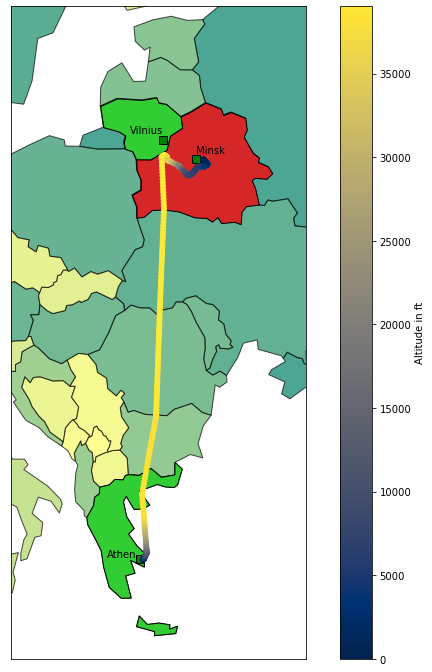

In [507]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

europe.plot(ax=ax, cmap="summer", alpha=0.7, edgecolor="black")

belarus = world[world.name == 'Belarus']
belarus.plot(ax=ax, edgecolor="black", color="tab:red")
litauen = world[world.name == 'Lithuania']
litauen.plot(ax=ax, edgecolor="black", color="limegreen")
greece = world[world.name == 'Greece']
greece.plot(ax=ax, edgecolor="black", color="limegreen")


print(float(x[1:]))
print(float(y[0:-1]))
vilnius = cities[cities.name == 'Vilnius']
a, x, y = str(vilnius["geometry"].iloc[0]).split(" ")
vilnius.plot(marker="s", ax=ax, edgecolor="black", color="green", markersize=50)
ax.text(float(x[1:]),float(y[0:-1])*1.003,s="Vilnius", va="bottom", ha="right", size="medium")
athen = cities[cities.name=='Athens']
a, x, y = str(athen["geometry"].iloc[0]).split(" ")
athen.plot(marker="s", ax=ax, edgecolor="black", color="green", markersize=50)
ax.text(float(x[1:])*0.99,float(y[0:-1]),s="Athen", va="bottom", ha="right", size="medium")
minsk = cities[cities.name=='Minsk']
a, x, y = str(minsk["geometry"].iloc[0]).split(" ")
minsk.plot(marker="s", ax=ax, edgecolor="black", color="green", markersize=50)
ax.text(float(x[1:]),float(y[0:-1])*1.003,s="Minsk", va="bottom", ha="left", size="medium")

plt.xlim(15,35)
plt.ylim(34,60)
#plt.plot(df_standardflug["Position OW"], df_standardflug["Position NS"], color="tab:red", alpha=0.7, linewidth=4)
plt.scatter(df["Position OW"], df["Position NS"], c=df["Altitude"], s=25, cmap="cividis", #cmap="cividis"
            #,linewidths=(df["Speed"]/75)
           ) 
plt.colorbar(label="Altitude in ft")

ax.set_yticks([])
ax.set_xticks([])

In [493]:
#europe = europe.to_crs(epsg=3857)
#import contextily as ctx
#ax = europe.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#ax.scatter(df["Position OW"], df["Position NS"], c=df["Altitude"], s=10) 
#ctx.add_basemap(ax, zoom=8)
#plt.xlim(0,50)
#plt.ylim(0,60)
